## Python中一切皆对象

参考：
1. [《深度剖析CPython解释器》1. Python中一切皆对象，这里的对象究竟是什么？解密Python中的对象模型](https://www.cnblogs.com/traditional/p/13391098.html)

在Python中，一切皆是对象。整型是一个对象，字符串是一个对象，字典是一个对象，甚至int, str, list等等。在加上我们使用class自定义的类，他们都是对象。

像int, str, list等基本类型，以及我们自定义的类，由于他们可以表示类型，因此我们称之为类型对象；
类型对象实例化得到的对象，我们称之为实例对象。
不管哪种对象，他们都属于对象。

因此，在Python中，面向对象的理念执行的很彻底，面向对象中的‘类’， ‘对象’ 在Python中都是通过对象实现的。

在面向对象理论中，存在着‘类’，和 ‘对象’两个概念。
像int, dict, tuple，以及使用class关键字自定义的类型对象实现了面向对象理论中的‘类’的概念；
而123, (1, 2, 3), 'xxx'等等这些事例对象则实现了面向对象理论中‘对象’的概念。
但是在Python中，面向对象的‘类’， 和 ‘对象’ 都是通过对象实现的。

In [17]:
#int它是一个类，因此它属于类型对象，类型对象实例化得到的对象属于实例对象。
int

int

In [19]:
int('3')

3

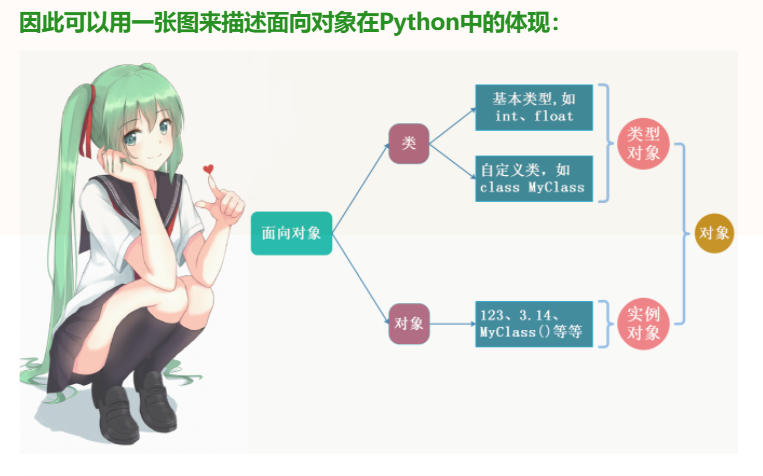

## 类型，对象体系

a是一个整数对象（实例对象）， 其类型也是int（类型对象） 

In [20]:
a = 123
a

123

In [21]:
type(a)

int

In [22]:
isinstance(a, int)

True

a是对象。a是int类型的。
int也是对象，那int是的类型是什么呢？

按照面向对象理论，对象是由类实例化得到的，这在Python中也是适用的。既然是对象，那么就必定有一个类来实例化它。也就是对象一定要有类型。

那么int的类型呢？

In [1]:
type(int)

type

In [2]:
type(str)

type

In [3]:
type(dict)

type

In [4]:
type(type)

type

我们看到类型对象的类型都是type。

我们初学python，使用type都是为了查看一个对象的类型，然而type的作用远没有这么简单。

我们可以把type称为元类，表示类型对象的类型。

而type本身的类型也是type。？？这个怎么理解？？

因此在Python中，任何对象都是有类型的。我们可以使用type函数查看；也可以获取该对象的 __class__属性查看

所以，Python中任何对象无非是：
1. 实例对象
2. 类型对象
3. 元类

### 在Python中还有个特殊的类型（对象）：object

它是所有类型对象的基类。

不管是什么类，内置的类也好，我们自定义的类也好，他们都继承自object。

所以，我们可以说object是所有类型对象的‘基类’ 或者说 ‘父类’

In [6]:
issubclass(int, object)

True

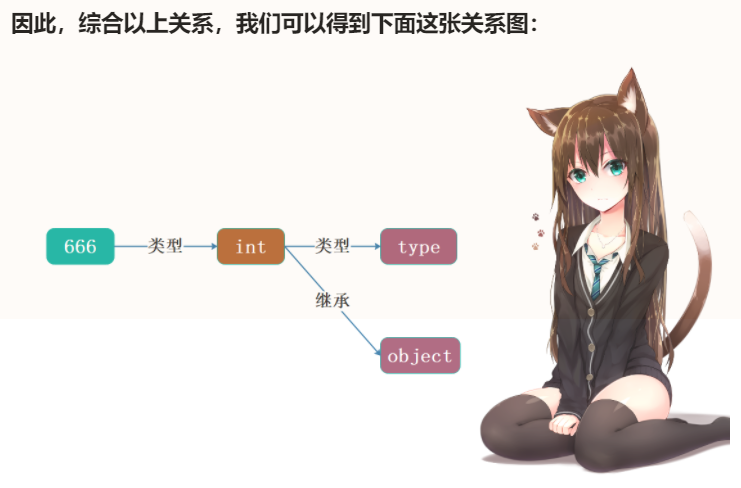

我们自定义的类型也是如此

In [7]:
class Female:
    pass
print(type(Female))
print(issubclass(Female, object))

<class 'type'>
True


这表明：在Python中，自定义的类即使不显示继承object，也会默认继承自object

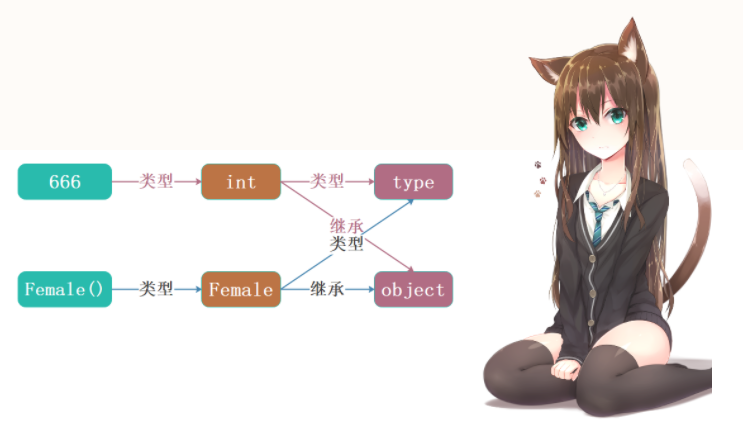

如果再自定义一个子类，继承Female会怎么样？

In [9]:
class Female:
    pass
class Girl(Female):
    pass
#自定义类的类型都是type
print(type(Girl))

<class 'type'>


In [10]:
#Girl继承自Female，所以它是Female的子类
print(issubclass(Girl, Female))

#Female继承自object, 所以Girl也是object的子类
print(issubclass(Girl, object))

True
True


In [12]:
#看看实例对象的类型
#看出：谁实例化得到的它，它就是什么类型
print(type(Girl()))
print(type(Female()))

<class '__main__.Girl'>
<class '__main__.Female'>


In [13]:
#Girl的父类是Female，Female的父类是object
#所以Girl的实例对象也是Female和object的实例对象
#Female的实例对象也是object的实例对象
print(isinstance(Girl(), Female))
print(isinstance(Girl(), object))

True
True


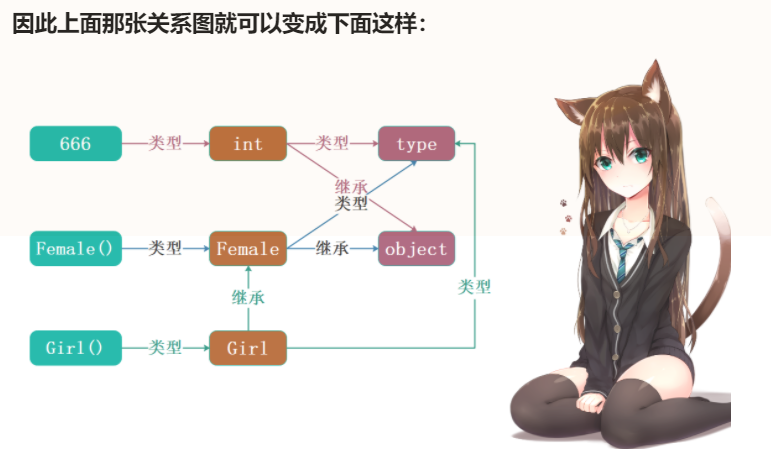

我们说可以使用type和__class__查看一个对象的类型，并且还可以通过isinstance类判断该对象是不是某个已知类型的实例对象

那么如果先查看一个类型对象都继承了哪些类？该怎么做？

目前的方法都是使用issubclass来判断某个类型对象是不是类一个已知类型对象的子类，那么可不可以直接获取某个类型对象都继承了哪些类？

### 有三种方法

In [14]:
class A:
    pass
class B:
    pass
class C(A):
    pass
class D(B, C):
    pass

In [15]:
#首先D继承自 B 和 C。C又继承自 A
#我们看D继承的父类
#使用 __base__
print(D.__base__)

<class '__main__.B'>


In [16]:
#使用__bases__
print(D.__bases__)

(<class '__main__.B'>, <class '__main__.C'>)


In [17]:
#使用__mro__
print(D.__mro__)

(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>)


* __base__: 如果继承了多个类，那么只显示继承的第一个类，没有显示继承则返回<class 'object'>

* __bases__: 返回一个元组，会显示所有直接继承的父类，如果没有显示的继承，则返回(<class 'object'>)

* __mro__: mro表示 Method Resolution Order,表示方法查找顺序。首先从自身出发，直到最顶层的父类。

最后看一下type和object。

type是所有类的元类，而object是所有类的基类。这说明type是继承自object的，object的类型是type。

In [18]:
type.__base__

object

In [22]:
object.__class__

type

In [25]:
object.__mro__

(object,)

type的类型还是type。但是object的基类不是object，而是None。

1. type站在类型金字塔的最顶端，任何的对象按照类型追根溯源，最终得到的都是type。

2. object站在继承金字塔的最顶端，任何的类型对象按照继承追根溯源，最终得到的都是object。

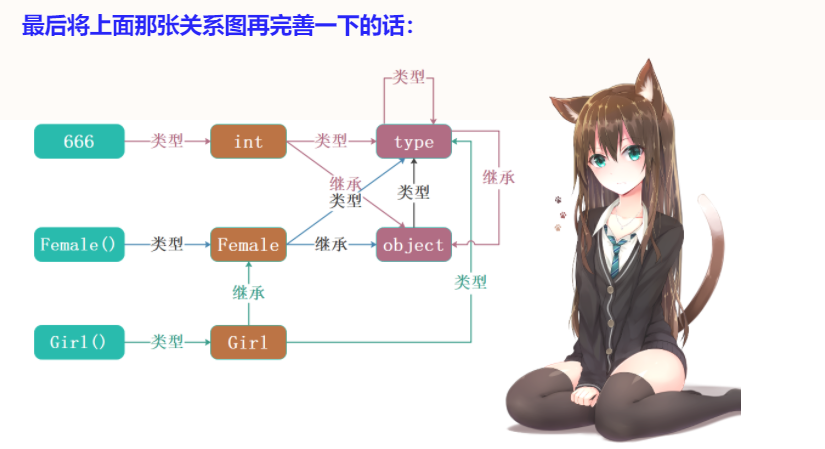

上边这张图表示了：
1. 实例对象的类型是类型对象。
2. 类型对象的类型是元类。
3. 所有的类型对象的基类都收敛于object。
4. 所有对象的类型都收敛于type。

## Python中的变量只是个名字

Python中的变量只是个名字，站在c语言的角度来说，Python中的变量存储的只是对象的内存地址，或者说是指针。这个指针指向的内存中，存储的才是对象。

> 所以在Python中，我们都说变量指向了某个对象。在其他静态语言中，变量相当于是为某块内存起的别名，获取变量等于获取这块内存所存储的值。
  而Python中变量代表的内存存储不是对象，而是对象的指针

In [ ]:
#include <stdio.h>

void main()
{
    int a = 123;
    printf("address of a = %p\n", &a);

    a = 456
    printf("address of a = %p\n", &a);
}
//输出结果
/*
address of a = 0x7fffa94de03c
address of a = 0x7fffa94de03c
*/

可以看到前后输出的地址是一样的

In [26]:
a = 666
print(hex(id(a)))

a = 667
print(hex(id(a)))

0x279a3885630
0x279a3885550


id(a)获取的不是a的地址，而是a指向的内存地址。

可以看到Python中变量a的地址前后发生了变化。

首先在C语言中，创建一个变量的时候必须规定好类型。比如 int a = 666。那么变量a就是int类型，以后在所处的作用域就不变了。如果这时侯再设置 a = 667，相当于是把内存中存储的666变成667.a的地址和类型是不会变化的。

而在Python中，a=666等于是先开辟一块内存，存储的值为666，然后让a指向这片内存，或者说是让a存储这块内存的指针。然后a=667的时候，再开辟一块内存，然后让a重新指向667的内存。由于这是两块不同的内存，所以他们的地址是不同的。

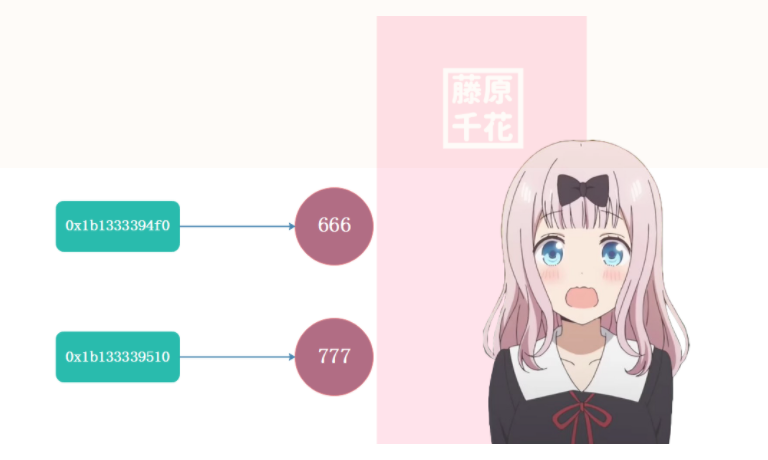

所以说Python中的变量它代表的是对象的指针。可以说，Python中的变量就是个便利贴，可以贴在任何对象上。

下边来看Python中，变量的传递

In [27]:
a = 666
print(hex(id(a)))

b = a
print(hex(id(b)))

0x279a38855f0
0x279a38855f0


可以看到打印出来的地址是一样的

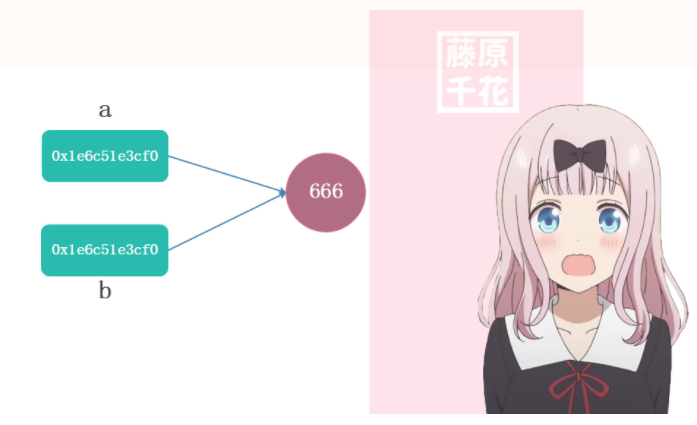

我们说a=666的时候，先开辟一份内存，再让a存储对应内存的指针；

然后b=a的时候，会把a的地址拷贝一份给b，所以b存储了和a相同的地址，他们都指向了同一个对象。

最关键的一点是，Python中的变量是一个指针，当传递一个变量的时候，传递的是指针；但是在操作一个变量的时候，会操作变量指向的内存

### 变量的类型

我们说变量的其实不是很准确，应该是变量指向（引用）的对象的类型。因为我们说Python中变量是一个指针，操作 指针 会操作 指针 指向的内存。

所以我们使用type(a)实际上查看的是变量a指向的内存的类型，当然为了方便也会直接说变量的类型。

那么问题来了，我们在创建一个变量的时候，并没有显示的指定类型，但是Python变量显然是有类型的。那么Python是如何判断一个变量指向得是什么类型的数据呢？

答案是：
解释器是通过猜的方式。通过你赋的值（或者说变量引用的值）来推断类型。所以在Python中，如果你想创建一个变量，那么必须在创建变量的时候同时赋值；否则解释器就不知道这个变量指向的数据是什么类型。

所以Python是先创建相应的值，这个值在C中对应一个结构体，结构体里边有一个成员专门用来存储该值对应的类型。当创建完值之后，再让变量指向它。所以在Python中是先有值，后有变量。

但显然在C中可不是这样的，因为C中变量代表的内存所存储的就是具体的值，所以C中可以直接声明一个变量的同时不赋值。因为C要求声明变量的同时必须制定类型，所以声明变量的同时，其类型和内存大小就已经固定了。

而Python中变量代表的内存是一个指针，它只是指向了某个对象，所以由于其便利贴的特性可以贴在任意对象上，但是不管贴在哪个对象，你都必须先有对象才行，要不没有对象，变量贴谁去？

另外，Python在创建变量的时候不需要指定类型。但是Python是强类型语言。而且是动态的。
类型的强弱和动不动态（是否需要显示声明类型）之间没有关系

### 补充 强类型 弱类型 动态 静态

1. 强类型：如果一门语言倾向于不对变量的类型做隐式转换，那我们将其称之为强类型语言

2. 弱类型：相反，如果一门语言倾向于对变量的类型做隐式转换，那我们则称之为弱类型语言

3. 动态类型：如果一门语言可以在运行时改变变量的类型，那我们称之为动态类型语言

4. 静态类型：相反，如果一门语言不可以在运行时改变变量的类型，则称之为静态类型语言

In [28]:
#首先，python不倾向于对类型做隐式转换，因此是强类型
a = 1
b = '1'
a<b

TypeError: '<' not supported between instances of 'int' and 'str'

In [29]:
#python在运行时，可以改变变量的类型，因此是动态语言
a = 1
a = '1'

## 可变对象和不可变对象

我们说一个对象其实就是一片被分配的内存空间，内存中存储了相应的值，不过这个空间可以是连续的也可以是不连续的

不可变对象一旦创建，其内存中存储的值就不可以再修改了。如果想修改，只能创建一个新的对象，然后让变量指向新的对象，所以前后的地址会发生改变。而可变对象在创建之后，其存储的值可以动态修改。

In [31]:
a = 666
print(id(a))

a = 667
print(id(a))

2721457919888
2721457919792


我们看到在对a执行+1操作时，前后抵制发生了变化，所以整型不支持本地修改。因此是一个不可变对象。

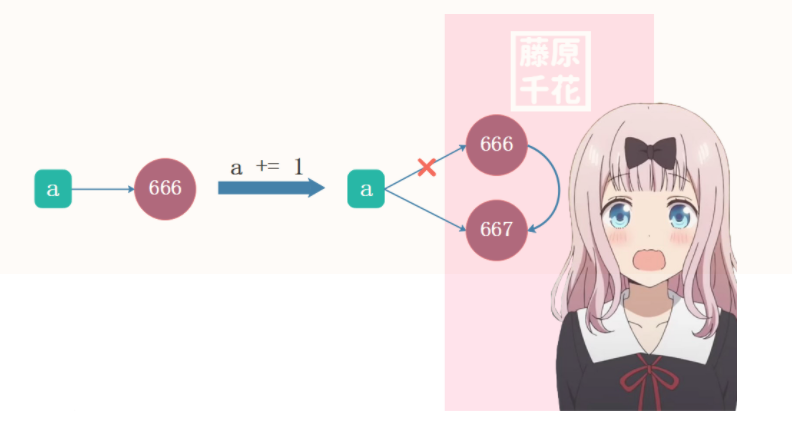

原来 a = 666，而我们说操作一个变量等于操作这个变量指向的内存。所以 a+=1 会将a指向的整型对象666和1做加法运算，得到667。

因为整型是不可变得，然后会开辟新空间老存储这个667，然后让a指向这片空间。

至于原来的666占用的怎么办，Python解释器会看到它的引用计数。如果不为0，代表还有变量引用（指向）它；如果为0，证明没有变量引用了，所以会被回收掉

### 列表是一个可变对象，它是可以修改的。

Python中的对象本质上就是C中malloc函数为结构体实例在堆区申请的一块内存。Python中的任何对象在C中都会对应一个结构体，这个结构体除了存放具体的值之外，还存放了额外的信息。

首先Python中列表，元组，集合 这些容器它们的内部存储的也不是具体的对象，而是对象的指针。比如：lst= [1, 2, 3], 你以为lst存储的是三个整型对象吗？其实不是的，lst存储的是三个整型对象的指针，当我们使用lst[0]的时候，拿到的是第一个元素的指针，但是操作（比如print）的时候，会自动操作（print）指针指向的内存

不知道你是否思考过，Python底层是C来实现的，所以Python中的列表的实现必须要借助C中的数组。可我们知道C中的数组里面的所有元素的类型必须一致，但列表却可以存放任意的元素，因此从这个角度讲，列表里存放的元素根本不可能是对象。因为不同的对象在底层对应的结构体是不同的，所以这个元素只能是指针。

可是不同对象的指针也是不同的啊，是的，但在C中的指针是可以转化的。Python底层将所有对象的指针都转成了PyObject的指针，这样就都是同一类型的指针了。

In [32]:
lst = [1, 2, 3]
print(id(lst))
print(id(lst[0]), id(lst[1]))

2721457723336
1623175392 1623175424


In [33]:
lst.append(4)
print(id(lst))

2721457723336


我们看到列表在添加元素的时候，前后地址并没有改变。列表在C中是通过PyListObject实现的，我们在介绍列表的时候会细说。这个PyListObject内部除了一些基本的信息之外，还有一个成员叫ob_item，它是一个PyObject的二级指针，指向了我们刚才说的PyObject \*类型的数组的首个元素的地址

结构图如下

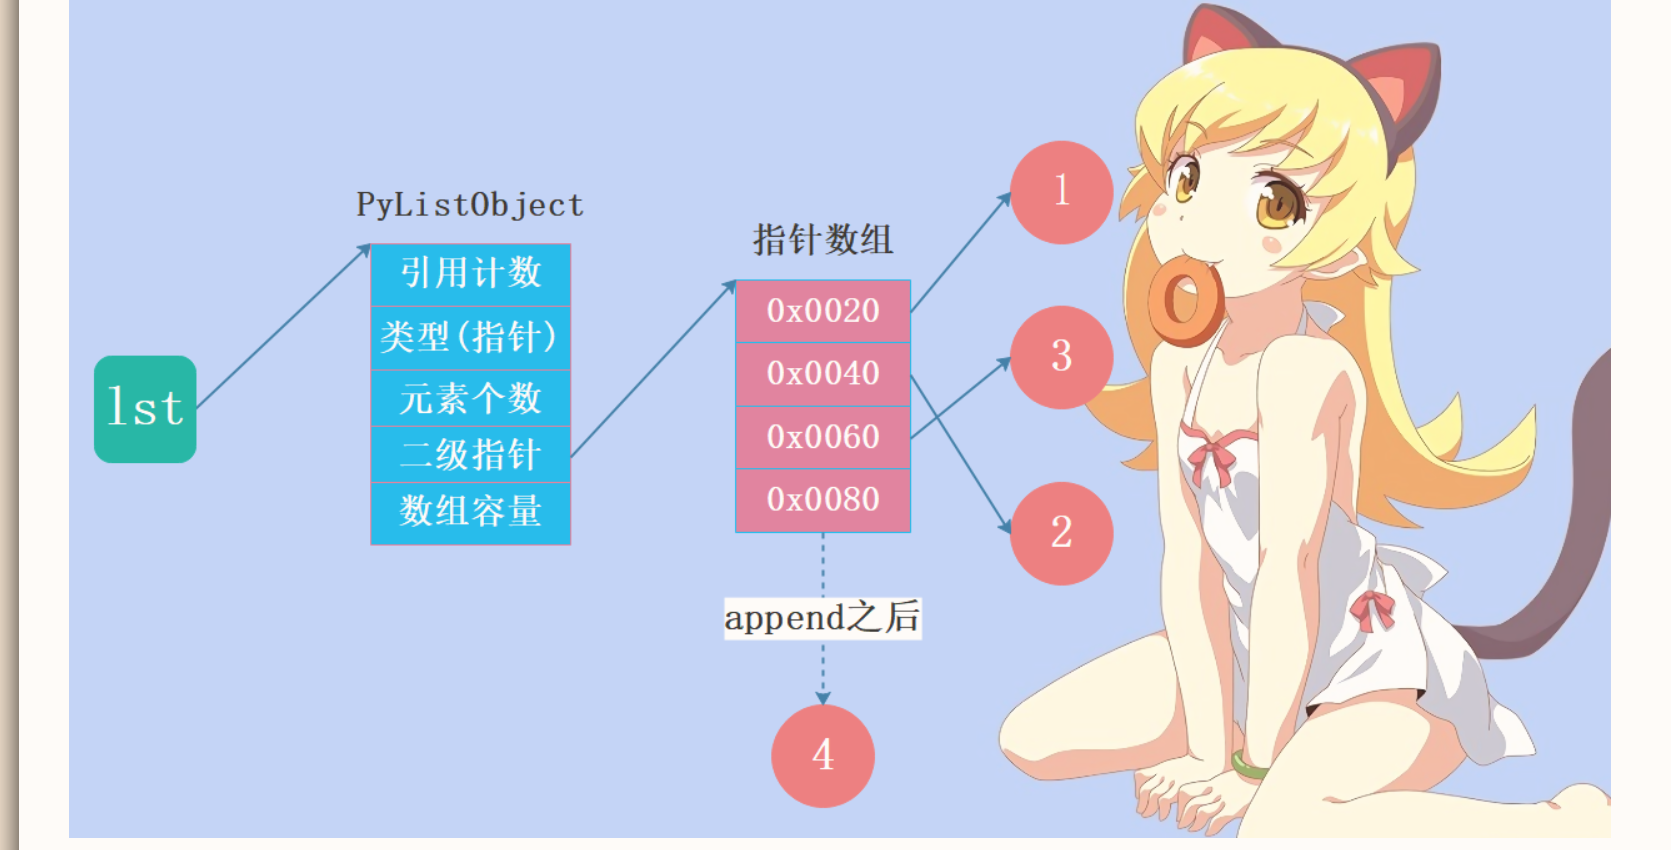

显然图中的指针数组是用来存储具体的对象的指针的，每一个指针都指向了相应的对象（这里是整型对象）。可能有人注意到，整型对象的顺序有点奇怪，其实是作者故意这么画的。因为 PyObject* 数组内部的元素是连续且有顺序的，但是指向的整型对象则是存储在堆区的，它们的位置是任意性的。但是不管这些整型对象存储在堆区的什么位置，它们和数组中的指针都是一一对应的。我们通过索引是可以正确获取到指向的对象的。

另外我们还可以看到一个现象，那就是Python中的列表在底层是分开存储的，因为PyListObject结构体并没有存储相应的指针数组，而是存储了指向了这个指针数组的二级指针。显然我们添加，删除，修改元素等操作，都是通过这个二级指针来间接操作这个指针数组。

### 为什么这么做呢？

因为在Python中一个对象一旦被创建，那么他在内存中的大小就不可以改变了。所以这就意味着那些可以容纳可变长度数据的可变对象，要在内部维护一个指向可变大小的内存区域的指针。而我们看到PyListObject正是这么做的，指针数组的长度，内存大小是可变的，所以PyListObject内部并没有直接存储它，而是存储了指向它的二级指针。但是Python在计算内存大小的时候，会将这个指针数组也算进去。所以Python中列表的大小是可变的，但是底层对应的PyListObject实例的大小是不变的。因为可变长度的指针数组没有存在PyListObject里面。为什么这么设计呢？

这么做的原因就在于，遵循这样的设计规则可以使通过指针维护对象的工作变得非常简单。一旦允许对象的大小可在运行期间改变，那么我们就可以考虑如下场景。在内存中有对象A，并且其后面紧跟着对象B。如果运行的某个时候，A的大小增大了，这就意味着必须将A整个移动到内存中其他位置，否则A增大的部分会覆盖掉原本属于B的数据。只要将A移动到内存的其他位置，那么所有指向A的指针就必须立即得到更新。可想而知这样的工作是多么繁琐，而通过一个指针去操作就变得简单多了。

## 定长对象和变长对象

Python中一个对象占用的内存有多大呢？相同类型的实例对象大小是否相同呢？试一下就知道了，我们可以通过sys模块中getsizeof函数查看一个对象所占的内存

In [44]:
import sys

print(sys.getsizeof(0))
print(sys.getsizeof(1))
print(sys.getsizeof(2 << 2))

print('*'*10)
print(sys.getsizeof(0.))
print(sys.getsizeof(3.14))
print(sys.getsizeof((2 << 2) + 4.2))

24
28
28
**********
24
24
24


我们看到整型对象的大小不同，所占的内存也不同，像这种内存大小不固定的对象，我们称之为变长对象；

而浮点数所占的内存都是一样的，像这种内存大小固定的对象，我们称之为定长对象。

至于Python是如何计算对象所占的内存，我们在剖析具体的对象的时候会说，因为这要涉及底层对应的结构体。

而且我们知道Python中的整数是不会溢出的，而C中的整型显然是有最大范围的，那么Python是如何做到的呢？答案是Python在底层是通过C的32位整型数组来存储自身的整型对象的，通过多个32位整型组合起来，以支持存储更大的数值，所以整型越大，就需要越多的32位整数。而32位整数是4字节，所以我们上面代码中的那些整型，都是4字节，4字节的增长。

当然，Python中的对象在底层都是一个结构体，这个结构体除了维护具体的值之外，还有其他的成员信息，在计算内存大小的时候，他们也是要考虑在内的。

而浮点数的大小是不变的，因为Python的浮点数的值在C中是通过一个double来维度，而C中的值一旦确定，大小就不变了，所以Python的float也是不变的。

但是既然是固定的类型，肯定范围是有限的，所以当浮点数不断增大，会牺牲精度来进行存储。如果实在过大，那么会抛出OverFlowError

In [46]:
int(1000000000000000000000000000000000000000000000.0)

999999999999999929757289024535551219930759168

In [47]:
10. ** 1000

OverflowError: (34, 'Result too large')

In [48]:
10 ** 1000

1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

还有字符串，字符串毫无疑问是变长对象，因为大小长度不同。

In [55]:
import sys
print(sys.getsizeof('a'))
print(sys.getsizeof('abc'))

50
52


In [56]:
print(sys.getsizeof(''))

51


51为什么？？

显然看到多了两个字符，多了两个字节。

## 小结

我们这一节介绍了Python中的对象体系，我们说Python中一切皆对象。

类型对象和实例对象都属于对象；还说了对象的种类。

根据是否支持本地修改，可以分为可变对象和不可变对象；

根据占用的内存是否不变，可以分为定长对象和变长对象。

还说了Python中变量的本质，Python中的变量本质上是一个指针，而变量的名字则存储在对应的名字空间（或者说命名空间）中。

名字空间分为：全局名字空间（存储全局变量），局部名字空间（存储局部变量），闭包名字空间（存储闭包变量），内建名字空间（存储内置变量，比如：int, str等）。

而名字空间有分为：静态名字空间和动态名字空间。

比如：局部名字空间，因为函数中的局部变量在编译的时候就可以确定，所以函数对应的局部名字空间使用一个数组存储；而全局变量在运行时可以进行动态添加，删除，因此全局名字空间使用的是一个字典来保存，字典的key就是变量的名字。字典的key依旧是个指针，底层是指向字符串PyUnicodeObject的指针，字典的value就是变量指向的对象的指针（或者说是变量本身）

In [3]:
a = 123
b = 'xx'

#通过globals()即可获取全局名字空间
print(globals())

'''
我们看到虽然显示的是变量名和变量指向的值
但是在底层，字典存储的键值对也是指向具体对象的指针
只不过我们说操作指针会操作指向的内存，所以这里pring打印之后，显示的也是具体的值，但是存储的是指针。
至于对象本身，则存储在堆区，并且被指针指向
'''

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "a = 123\nb = 'xx'\nprint(globals())", "a = 123\nb = 'xx'\nprint(globals())", "a = 123\nb = 'xx'\n\n#通过globals()即可获取全局名字空间\nprint(globals())\n\n'''\n我们看到虽然显示的是变量名和变量指向的值\n但是在底层，字典存储的键值对也是指向具体对象的指针\n只不过我们说操作指针会操作指向的内存，所以这里pring打印之后，显示的也是具体的值，但是存储的是指针。\n至于对象本身，则存储在堆区，并且被指针指向\n'''"], '_oh': {}, '_dh': ['C:\\Users\\hkx\\Desktop\\python'], 'In': ['', "a = 123\nb = 'xx'\nprint(globals())", "a = 123\nb = 'xx'\nprint(globals())", "a = 123\nb = 'xx'\n\n#通过globals()即可获取全局名字空间\nprint(globals())\n\n'''\n我们看到虽然显示的是变量名和变量指向的值\n但是在底层，字典存储的键值对也是指向具体对象的指针\n只不过我们说操作指针会操作指向的内存，所以这里pring打印之后，显示的也是具体的值，但是存储的是指针。\n至于对象本身，则存储在堆区，并且被指针指向\n'''"], 'Out': {}, 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInter

'\n我们看到虽然显示的是变量名和变量指向的值\n但是在底层，字典存储的键值对也是指向具体对象的指针\n只不过我们说操作指针会操作指向的内存，所以这里pring打印之后，显示的也是具体的值，但是存储的是指针。\n至于对象本身，则存储在堆区，并且被指针指向\n'

In [5]:
#此外，我们往全局名字空间中设置一个键值对，也等价于创建了一个全局变量
globals()['c'] = 'hello'
print(c)

hello


In [6]:
#此外，这个全局名字空间也是唯一的，即使你把它放在函数里也是一样
def foo():
    globals()['d'] = 'kk'
foo()
print(d)

kk
